In [4]:
#analysis -> feat eng ->  model -> web app 

In [5]:
!pip install pandas
!pip install numpy 
!pip install matplotlib.pyplot
!pip install seaborn 

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [6]:
!pip install matplotlib

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [8]:
pd.set_option("display.max_columns" , None)

In [9]:
sns.set_style("whitegrid")

In [10]:
df = pd.read_csv("german_credit_data.xls")

In [11]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [12]:
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [13]:
df.shape

(1000, 11)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [15]:
df.describe(include="all")

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,499.500000,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,288.819436,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,0.000000,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,249.750000,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,499.500000,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,749.250000,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


In [16]:
df["Job"].unique()

array([2, 1, 3, 0])

In [17]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df = df.dropna().reset_index(drop=True)

In [20]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [21]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [22]:
df.drop(columns="Unnamed: 0" , inplace=True)

In [23]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

Text(0.5, 0.98, 'Distributions of Numerical Features')

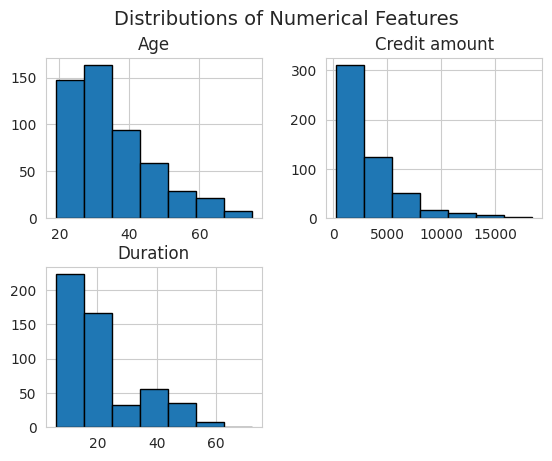

In [24]:
df[["Age","Credit amount", "Duration"]].hist(bins=7 , edgecolor = "black")
plt.suptitle("Distributions of Numerical Features", fontsize= 14)

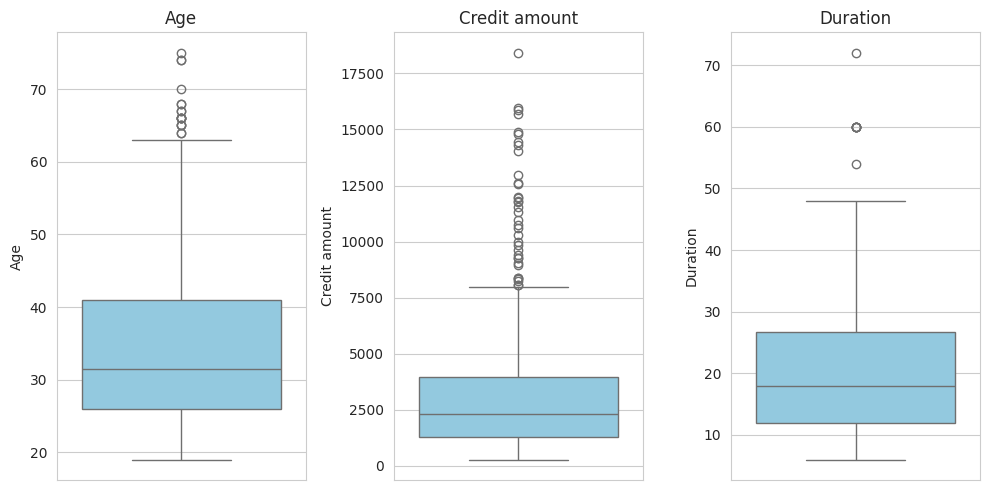

In [25]:
plt.figure(figsize=(10,5))
for i , col in enumerate(["Age" , "Credit amount" , "Duration"]):
    plt.subplot(1,3 , i + 1 )
    sns.boxplot(y = df[col] , color="skyblue")
    plt.title(col)
plt.tight_layout()
plt.show()


In [26]:
df.query("Duration >=60 ")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [27]:
categorical_cols = ["Sex", "Job" ,"Housing" , "Saving accounts" , "Checking account" , "Purpose"]

/tmp/ipykernel_16279/2067526416.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x = col , palette="Set2" , order = df[col].value_counts().index )
/tmp/ipykernel_16279/2067526416.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x = col , palette="Set2" , order = df[col].value_counts().index )
/tmp/ipykernel_16279/2067526416.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x = col , palette="Set2" , order = df[col].value_counts().index )
/tmp/ipykernel_16279/2067526416.py:4: FutureWarning: 

Passin

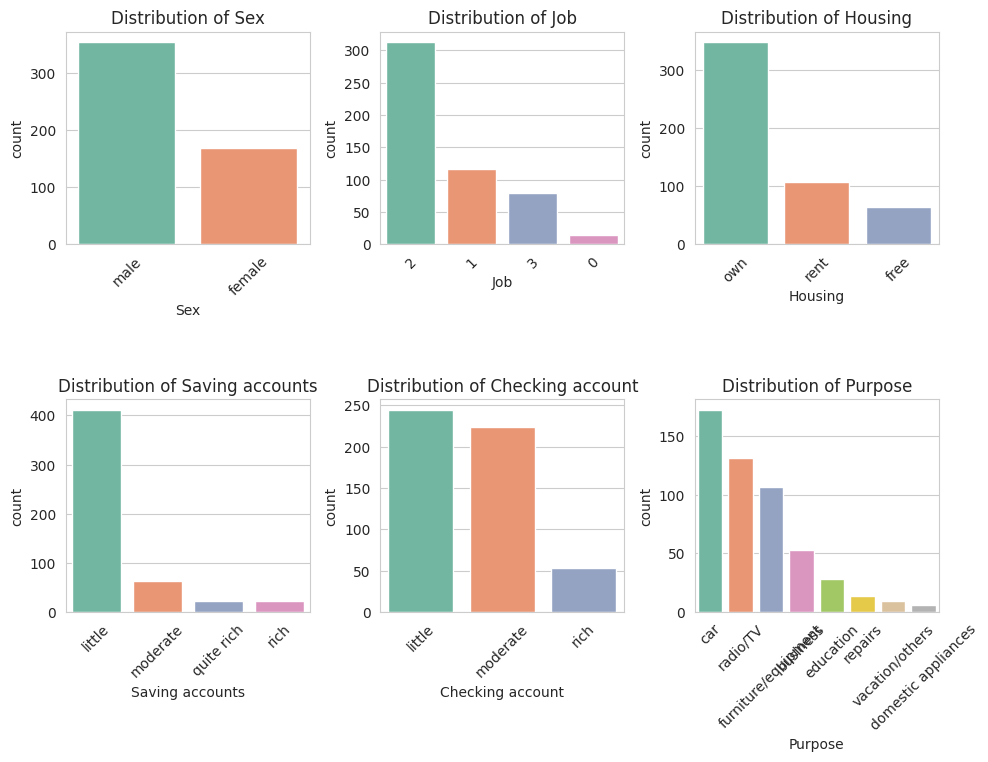

In [29]:

plt.figure(figsize=(10,10))
for i , col in enumerate(categorical_cols):
    plt.subplot(3,3,i + 1 )
    sns.countplot(data= df, x = col , palette="Set2" , order = df[col].value_counts().index )
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
corr = df[["Age","Job" ,"Credit amount", "Duration"]].corr()

In [31]:
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


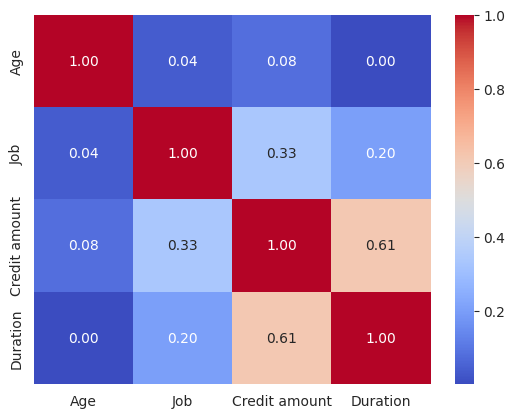

In [32]:
sns.heatmap(corr , annot= True , cmap = "coolwarm" , fmt=".2f")
plt.show()

In [33]:
df.groupby("Job")["Credit amount"].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [34]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [35]:
df.groupby("Sex")["Job"].mean()

Sex
female    1.803571
male      1.909605
Name: Job, dtype: float64

In [36]:
pd.pivot_table(df, values="Credit amount" , index= "Housing" , columns="Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


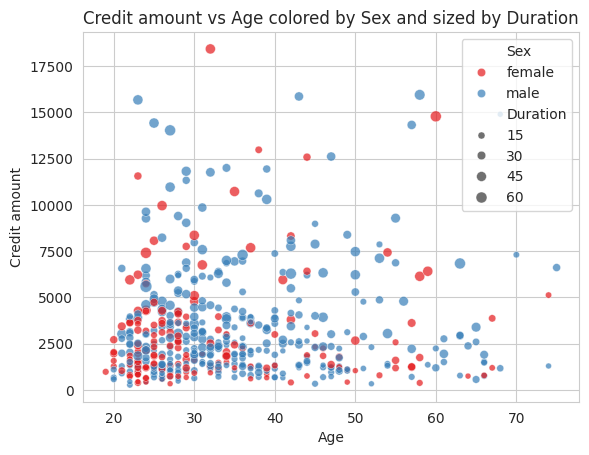

In [37]:
sns.scatterplot(data=df , x= "Age" , y="Credit amount" , hue="Sex" , size= "Duration" , alpha=0.7 , palette="Set1")
plt.title("Credit amount vs Age colored by Sex and sized by Duration")
plt.show()

/tmp/ipykernel_16279/1137625390.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df  , x="Saving accounts" , y="Credit amount" , palette="Pastel1")


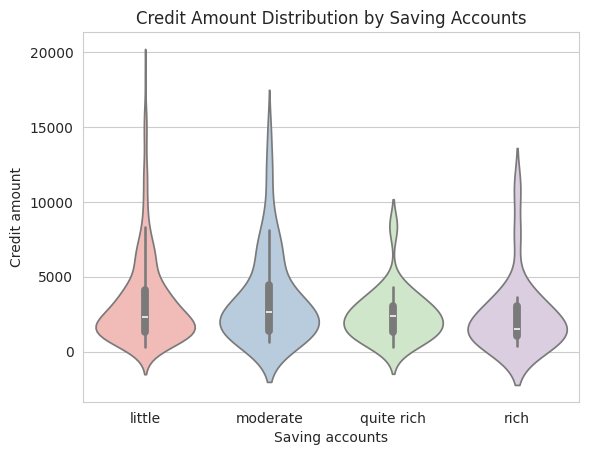

In [39]:
sns.violinplot(data=df  , x="Saving accounts" , y="Credit amount" , palette="Pastel1")
plt.title("Credit Amount Distribution by Saving Accounts")
plt.show()  

In [40]:
df["Risk"].value_counts(normalize=True) * 100 

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

/tmp/ipykernel_16279/3867664850.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df, x = "Risk", y= col , palette="Pastel2")
/tmp/ipykernel_16279/3867664850.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df, x = "Risk", y= col , palette="Pastel2")
/tmp/ipykernel_16279/3867664850.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df, x = "Risk", y= col , palette="Pastel2")


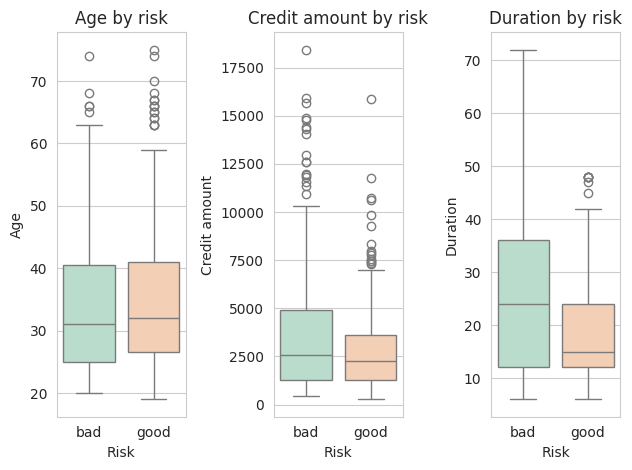

In [ ]:

for i, col in enumerate(["Age" , "Credit amount" , "Duration"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(data= df, x = "Risk", y= col , palette="Pastel2")
    plt.title(f"{col} by risk")

plt.tight_layout()
plt.show()

In [43]:
df.groupby("Risk")[["Age", "Credit amount",  "Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


In [41]:
categorical_cols

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

In [ ]:
for i , col in enumerate(categorical_cols):
    plt.subplot(3,3, i+1)
    sns.countplot(data=df , x = col , hue= "Risk" , palette="Set1", order=df[col].value_counts().index)
    plt.title()

SyntaxError: expected ':' (4280856778.py, line 1)

In [ ]:
:
